In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.io import loadmat

from itertools import product

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Q2 Part 1

### a.) 

In [5]:
df = pd.read_csv("data/marriage.csv", header=None)
print(df.shape)
df.head()

(170, 55)


0         1         2         3         4         5         6   \
0  1.560903  3.681587  3.450467  3.211998 -1.203045  0.597706 -0.970093   
1  4.153272  5.173858  4.100690  2.580173  3.305788 -1.505512 -0.029398   
2  2.226241  1.575322  2.389117  2.725405 -0.304562  2.832803  1.787779   
3  3.553458  2.859042  2.928414  1.833241  1.271119  4.165213  2.078597   
4  0.506547  1.419223  1.716153  1.319274  2.853840  0.047412 -0.016515   

         7         8         9   ...        45        46        47        48  \
0 -0.750970 -0.511495 -0.133660  ...  2.077401  1.184182  3.955069  2.608046   
1  5.702657  2.230281  4.975496  ...  3.467076  2.451984  3.504294  5.324240   
2  0.565755  1.328212  2.335353  ...  1.200917  1.241794  2.207492  1.228034   
3  4.506175  2.521628  2.747315  ...  3.196291  2.204824  3.664982  3.689508   
4  0.620795  1.202992  0.078347  ...  1.806657  2.085539  2.012551  1.899477   

         49        50        51        52        53   54  
0  2.303629  1.721660  3.275018  1.761019  1.215237  1.0  
1  4.480607  5.375248  2.270379  2.167944  2.191214  1.0  
2  0.870052  1.685040  2.341985 -0.444320  2.527452  1.0  
3  2.577677  3.171884  2.164660  1.813024  1.376033  1.0  
4  1.510134  1.373350  2.551119  0.846321 -0.066858  1.0  

[5 rows x 55 columns]

In [115]:
df.iloc[:, -1]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
165    0.0
166    0.0
167    0.0
168    0.0
169    0.0
Name: 54, Length: 170, dtype: float64

In [7]:
divorce = df.iloc[:, -1]
dat = df.iloc[:, :-1]

In [9]:
print(divorce.shape)
dat.shape

(170,)


(170, 54)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(dat.values, divorce.values, test_size=0.2, random_state=1234, stratify=divorce.values)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 54)
(34, 54)
(136,)
(34,)


## Naive Bayes

Not finding any features with a variance close to 0

In [175]:
dat.values.var(axis=0)

array([3.699232  , 3.01057444, 2.86717162, 3.29857823, 3.42165628,
       1.80839576, 1.69838961, 3.16470522, 3.77263139, 2.49830908,
       4.01096409, 3.01344354, 3.29015989, 3.14030268, 3.21729252,
       3.24100654, 3.33689258, 3.21305428, 3.78022589, 2.95005403,
       2.89464263, 2.98008491, 3.16640142, 3.34562613, 3.62186144,
       3.09138147, 3.05606417, 3.12034234, 3.4285318 , 3.47771537,
       3.32594913, 3.64038311, 4.32816249, 3.56199492, 4.18065884,
       3.89061562, 4.17045849, 3.9299549 , 4.06143909, 4.11205887,
       3.9701091 , 3.96778436, 2.59911671, 4.12516455, 3.26690784,
       2.88709693, 3.30937341, 2.12652735, 3.30484706, 3.0859122 ,
       2.4801649 , 3.27047472, 3.48842774, 3.399469  ])

In [176]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [177]:
accuracy_score(y_test, y_pred)

0.9705882352941176

## Logistic Regression

In [178]:
clf = LogisticRegression(random_state=1234)
y_pred_lr = clf.fit(X_train, y_train).predict(X_test)

In [179]:
accuracy_score(y_test, y_pred_lr)

0.9705882352941176

## KNN

In [180]:
knn_scores = {}
for i in range(2, 20):
    
    pred = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train).predict(X_test)
    knn_scores[i] = accuracy_score(y_test, pred)
    

In [181]:
knn_scores

{2: 0.9705882352941176,
 3: 0.9705882352941176,
 4: 0.9705882352941176,
 5: 0.9705882352941176,
 6: 0.9705882352941176,
 7: 0.9705882352941176,
 8: 0.9705882352941176,
 9: 0.9705882352941176,
 10: 0.9705882352941176,
 11: 0.9705882352941176,
 12: 0.9705882352941176,
 13: 0.9705882352941176,
 14: 0.9705882352941176,
 15: 0.9705882352941176,
 16: 0.9705882352941176,
 17: 0.9705882352941176,
 18: 0.9705882352941176,
 19: 0.9705882352941176}

--- 

# PCA projections

### b.)

In [182]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Naive Bayes

In [183]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train_pca, y_train).predict(X_test_pca)

In [184]:
accuracy_score(y_test, y_pred)

0.9705882352941176

## Logistic Regression

In [185]:
clf = LogisticRegression(random_state=1234)
y_pred_lr = clf.fit(X_train_pca, y_train).predict(X_test_pca)
accuracy_score(y_test, y_pred_lr)

1.0

## Knn

In [186]:
knn_scores = {}
for i in range(2, 20):
    
    pred = KNeighborsClassifier(n_neighbors=i).fit(X_train_pca, y_train).predict(X_test_pca)
    knn_scores[i] = accuracy_score(y_test, pred)

In [187]:
knn_scores

{2: 0.9705882352941176,
 3: 1.0,
 4: 0.9705882352941176,
 5: 0.9705882352941176,
 6: 0.9705882352941176,
 7: 0.9705882352941176,
 8: 0.9705882352941176,
 9: 0.9705882352941176,
 10: 0.9705882352941176,
 11: 0.9705882352941176,
 12: 0.9705882352941176,
 13: 0.9705882352941176,
 14: 0.9705882352941176,
 15: 0.9705882352941176,
 16: 0.9705882352941176,
 17: 0.9705882352941176,
 18: 0.9705882352941176,
 19: 0.9705882352941176}

In [189]:
clfit_gnb = gnb.fit(X_train_pca, y_train)
clfit_lr = clf.fit(X_train_pca, y_train)
clfit_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_pca, y_train)

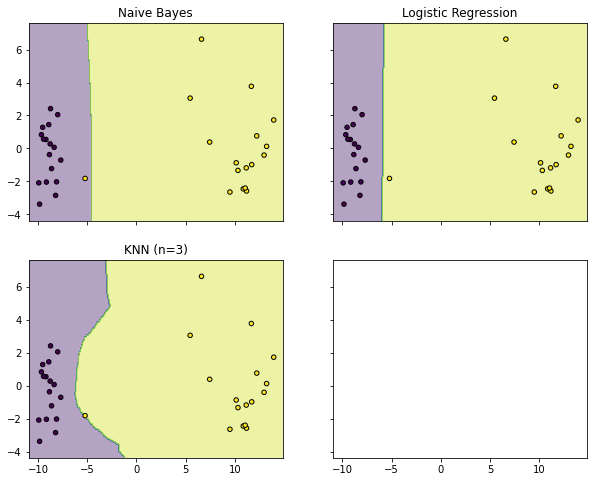

In [201]:

# Plotting decision regions
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clfit_gnb, clfit_lr, clfit_knn],
    ["Naive Bayes", "Logistic Regression", "KNN (n=3)"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [202]:
plt.savefig("img/q2_part1_b.png")

<Figure size 432x288 with 0 Axes>

--- 

# Part 2




In [2]:
def reports(truth, pred):
    print("Confusion Matrix:")
    print(pd.DataFrame(confusion_matrix(truth, pred), index = [x for x in range(10)]))
    print("\nScores:")
    print(classification_report(truth, pred))

In [3]:
numbers = loadmat('data/mnist_10digits.mat')
numbers

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Oct 13 20:00:03 2020',
 '__version__': '1.0',
 '__globals__': [],
 'xtrain': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytrain': array([[5, 0, 4, ..., 5, 6, 8]]),
 'xtest': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'ytest': array([[7, 2, 1, ..., 4, 5, 6]])}

In [4]:
xtrain = numbers['xtrain'] / 255
ytrain = numbers['ytrain'].T 
xtest = numbers['xtest'] / 255
ytest = numbers['ytest'].T

## KNN

In [5]:
np.random.seed(6740)
dsidx = np.random.randint(10000, size=50000)

In [6]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [238]:
number_knn_scores = {}
for i in range(2, 10, 1):
    print(i)
    pred = KNeighborsClassifier(n_neighbors=i).fit(xtrain[dsidx, :], ytrain[dsidx]).predict(xtest)
    number_knn_scores[i] = accuracy_score(ytest, pred)

2


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


3


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


4


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


5


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


6


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


7


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


8


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


9


/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [239]:
pd.DataFrame(number_knn_scores, index = [x for x in range(2, 10, 1)])

2       3       4       5       6      7       8       9
2  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
3  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
4  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
5  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
6  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
7  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
8  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401
9  0.9455  0.9458  0.9452  0.9449  0.9434  0.943  0.9403  0.9401

In [7]:
knn = KNeighborsClassifier(n_neighbors=3).fit(xtrain[dsidx, :], ytrain[dsidx])


knn_pred = knn.predict(xtest)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [31]:
print("KNN")
reports(ytest, knn_pred)

KNN
Confusion Matrix:
     0     1    2    3    4    5    6    7    8    9
0  971     1    1    0    0    1    4    1    1    0
1    0  1130    1    2    0    0    2    0    0    0
2   15    14  960   10    1    1    3   23    5    0
3    1     1    4  943    1   25    3   12    9   11
4    0    12    0    0  916    0    8    6    2   38
5    8     4    0   27    3  830   10    2    2    6
6    9     4    0    0    3    3  938    0    1    0
7    0    26    8    1    4    1    0  970    1   17
8    9     5    8   32    4   21    8    8  860   19
9    6     6    3    7   20    3    2   17    5  940

Scores:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.94      1.00      0.97      1135
           2       0.97      0.93      0.95      1032
           3       0.92      0.93      0.93      1010
           4       0.96      0.93      0.95       982
           5       0.94      0.93      0.93       892
       

## Logistic Regression

In [35]:
clf = LogisticRegression(random_state=6740, max_iter=1000)
lr_pred = clf.fit(xtrain, ytrain).predict(xtest)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print("LOGISTIC REGRESSION")
reports(ytest, lr_pred)

LOGISTIC REGRESSION
Confusion Matrix:
     0     1    2    3    4    5    6    7    8    9
0  955     0    2    4    1   10    4    3    1    0
1    0  1110    5    2    0    2    3    2   11    0
2    6     9  930   14   10    3   12   10   34    4
3    4     1   16  925    1   23    2   10   19    9
4    1     3    7    3  921    0    6    5    6   30
5    9     2    3   35   10  777   15    6   31    4
6    8     3    8    2    6   16  912    2    1    0
7    1     7   23    7    6    1    0  947    4   32
8    9    11    6   22    7   29   13   10  855   12
9    9     8    1    9   21    7    0   21    9  924

Scores:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88  

## Linear SVM

In [19]:
svm = SVC(kernel='linear').fit(xtrain[dsidx, :], ytrain[dsidx])

svm_pred = svm.predict(xtest)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print("LINEAR SVM")
reports(ytest, svm_pred)

LINEAR SVM
Confusion Matrix:
     0     1    2    3    4    5    6    7    8    9
0  954     0    7    1    0    6    8    2    1    1
1    0  1120    1    2    1    1    4    1    5    0
2   10    11  926   11   11    4   14   11   31    3
3    3     3   27  904    2   24    2   10   26    9
4    2     2   10    0  926    0    5    5    2   30
5   12     5    7   62    9  748   15    1   27    6
6   11     3   11    0   10   13  907    0    2    1
7    2     9   23   14   10    0    0  937    4   29
8    7    17   10   41    9   34   11    6  829   10
9    8     7    1   16   58    5    1   41    5  867

Scores:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.99      0.97      1135
           2       0.91      0.90      0.90      1032
           3       0.86      0.90      0.88      1010
           4       0.89      0.94      0.92       982
           5       0.90      0.84      0.87       892


## Kernel SVM

In [21]:
svm = SVC().fit(xtrain[dsidx, :], ytrain[dsidx])

rbf_svm_pred = svm.predict(xtest)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print("KERNEL SVM")
reports(ytest, rbf_svm_pred)

KERNEL SVM
Confusion Matrix:
     0     1     2    3    4    5    6    7    8    9
0  969     0     2    0    0    2    4    1    2    0
1    0  1124     2    1    0    1    4    1    2    0
2    5     0  1000    2    3    0    5    9    5    3
3    1     0    15  970    1    7    1    7    4    4
4    1     1     4    0  950    0    7    1    1   17
5    7     1     1   17    2  850    6    1    5    2
6    6     3     2    0    4    3  937    0    3    0
7    0    13    18    5    5    0    0  974    0   13
8    3     1     3    8    6    7    0    3  939    4
9    5     5     1   10   15    3    0   11    8  951

Scores:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96

## Neural Network

In [26]:
clf_nn = MLPClassifier(hidden_layer_sizes = (20, 10), random_state=6740, max_iter=1000).fit(xtrain, ytrain)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
nn_pred = clf_nn.predict(xtest)

In [34]:
print("NEURAL NETWORK")
reports(ytest, nn_pred)

NEURAL NETWORK
Confusion Matrix:
     0     1    2    3    4    5    6    7    8    9
0  949     0    1    1    5    4    7    5    5    3
1    0  1117    2    3    0    2    4    2    5    0
2    6     4  968   18    5    3    5   12   10    1
3    6     6   13  934    0   12    2   14   18    5
4    1     0    4    2  946    3    3    2    3   18
5    3     1    0   25    1  836   14    1    9    2
6    6     5    6    1    3    8  921    1    7    0
7    3     6   12   13    1    4    1  969    6   13
8    9     7    2   18   11    9   11    6  888   13
9    7     3    3   12   19    1    1    5    8  950

Scores:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.96      0.94      0.95      1032
           3       0.91      0.92      0.92      1010
           4       0.95      0.96      0.96       982
           5       0.95      0.94      0.94       